# Predicción precio Airbnb

## 1. Importar librerias

In [348]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## 2. Cargar el Data Set

In [349]:
data = pd.read_csv('airbnb-listings-extract.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


## 3. Limpieza del Data Set

El objetivo es Madrid, revisando el csv se aprecia que en la columna 'City' hay errores con el nombre Madrid. Sin embargo en la columna 'Market' aparece la ciudad y aparentemente parece que no hay errores. Se analiza la columna para comprobar que corresponden todas las filas a 'Madrid'.

In [350]:
unique_market = data['Market'].unique()
print("Valores únicos en la columna 'Market':", unique_market)

Valores únicos en la columna 'Market': ['Austin' 'Barcelona' 'Amsterdam' 'Antwerp' 'Paris' 'Mallorca Island'
 'Madrid' nan 'Other (International)' 'Los Angeles' 'London' 'New York'
 'Dublin' 'Edinburgh' 'Rome' 'Brussels' 'D.C.' 'Athens' 'Manchester'
 'Copenhagen' 'Sydney' 'Seattle' 'Berlin' 'Vienna' 'Montreal' 'Boston'
 'Venice' 'Melbourne' 'Chicago' 'Geneva' 'Toronto' 'Denver' 'Vancouver'
 'San Francisco' 'East Bay, CA' 'Hong Kong' 'Malibu' 'New Orleans'
 'San Diego' 'Santiago' 'Toledo' 'Byron Bay' 'Nashville' 'Deauville']


Efectivamente aparece correctamente la ciudad por lo que se crea un dataframe nuevo unicamente con la información de Madrid extraida de la columna 'Market'.

In [351]:
df_madrid= data.loc[data['Market'] == 'Madrid']
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 40 to 14757
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              13274 non-null  int64  
 1   Listing Url                     13274 non-null  object 
 2   Scrape ID                       13274 non-null  int64  
 3   Last Scraped                    13274 non-null  object 
 4   Name                            13274 non-null  object 
 5   Summary                         12785 non-null  object 
 6   Space                           9645 non-null   object 
 7   Description                     13268 non-null  object 
 8   Experiences Offered             13274 non-null  object 
 9   Neighborhood Overview           8285 non-null   object 
 10  Notes                           4996 non-null   object 
 11  Transit                         8211 non-null   object 
 12  Access                         

Se revisan las columnas que hay en df_madrid

In [352]:
column_names = df_madrid.columns
print(column_names)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [353]:
df_madrid.describe(include='all')

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
count,1.327400e+04,13274,1.327400e+04,13274,13274,12785,9645,13268,13274,8285,...,10379.000000,10362.000000,10362.000000,249,0,13274,13274.000000,10512.000000,13274,13274
unique,NaN,13274,NaN,2,12875,11998,9010,12820,1,7167,...,NaN,NaN,NaN,241,0,5,NaN,NaN,13274,62
top,NaN,https://www.airbnb.com/rooms/6478626,NaN,2017-04-08,Apartamento en el centro de Madrid,"Unique apartment in vibrant neighborhoods, car...",Tenga en cuenta que nuestra propuesta es simpl...,Es un piso con 6 habitaciones de las que 5 ha...,none,Se trata de una de las zonas más emblemáticas ...,...,NaN,NaN,NaN,VT1046,NaN,strict,NaN,NaN,"40.4069528479,-3.6708944906","Host Has Profile Pic,Host Identity Verified,Is..."
freq,NaN,1,NaN,13273,12,22,19,19,13274,32,...,NaN,NaN,NaN,3,NaN,5007,NaN,NaN,1,2370
mean,1.042430e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.644571,9.542752,9.212025,NaN,NaN,NaN,7.559816,1.924306,NaN,NaN
std,5.524515e+06,NaN,7.996453e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.758063,0.766767,0.954580,NaN,NaN,NaN,19.592132,1.889577,NaN,NaN
min,1.862800e+04,NaN,2.017032e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,NaN,NaN,NaN,1.000000,0.020000,NaN,NaN
25%,5.831642e+06,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,9.000000,9.000000,NaN,NaN,NaN,1.000000,0.480000,NaN,NaN
50%,1.155029e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,9.000000,NaN,NaN,NaN,2.000000,1.270000,NaN,NaN
75%,1.539478e+07,NaN,2.017041e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000000,10.000000,NaN,NaN,NaN,4.000000,2.880000,NaN,NaN


Se eliminan de df_madrid aquellas columnas que no son relevantes para nuestro estudio como datos repetidos, urls, imagenes, información del propietario, información repetida sobre el precio o la geolocalización. El en caso del barrio hay tres columnas, nos quedamos con la que mas datos aporta.

In [354]:
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street','Neighbourhood', 'Neighbourhood Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Bed Type', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features'], axis=1)
df_madrid.head().T

,40,41,42,43,44
Neighbourhood Group Cleansed,Retiro,Salamanca,Salamanca,Salamanca,Salamanca
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Entire home/apt
Accommodates,2,2,3,1,6
Bathrooms,2.0,1.0,1.0,1.0,1.0
Bedrooms,1.0,0.0,0.0,1.0,2.0
Beds,1.0,1.0,2.0,1.0,3.0
Amenities,"TV,Wireless Internet,Kitchen,Heating,Essential...","TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Kitchen,Doorman,Ele...","TV,Internet,Wireless Internet,Air conditioning..."
Square Feet,NaN,NaN,NaN,NaN,NaN
Price,28.0,58.0,70.0,26.0,70.0


Se revisa en data frame con las columnas seleccionadasm tanto el tipo como el porcentaje de NA.

In [355]:
df_madrid.dtypes

Neighbourhood Group Cleansed     object
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Amenities                        object
Square Feet                     float64
Price                           float64
Cleaning Fee                    float64
Availability 90                   int64
Review Scores Rating            float64
dtype: object

## 4. División train/test

In [356]:
train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10619, 13)
Dimensiones del dataset de test: (2655, 13)


Se convierte la columna 'Square Feet' a 'Square Meters' y se elimina la columna 'Square Feet'.

In [357]:
df_train['Square Meters'] = df_train['Square Feet'] * 0.092903
df_train = df_train.drop(columns=['Square Feet'])
column_names = df_train.columns
df_train.head().T

,0,1,2,3,4
Neighbourhood Group Cleansed,Centro,Chamberí,Centro,Salamanca,Centro
Property Type,Apartment,Apartment,Apartment,Loft,Condominium
Room Type,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,1,2,4,2
Bathrooms,1.0,2.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,2.0,0.0
Beds,1.0,1.0,1.0,3.0,1.0
Amenities,"TV,Wireless Internet,Air conditioning,Kitchen,...","TV,Wireless Internet,Air conditioning,Heating,...","TV,Wireless Internet,Air conditioning,Kitchen,...","TV,Cable TV,Internet,Wireless Internet,Air con...","TV,Wireless Internet,Air conditioning,Kitchen,..."
Price,45.0,75.0,68.0,145.0,35.0
Cleaning Fee,10.0,NaN,NaN,60.0,NaN


In [358]:
na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Neighbourhood Group Cleansed     0.01%
Property Type                    0.00%
Room Type                        0.00%
Accommodates                     0.00%
Bathrooms                        0.41%
Bedrooms                         0.17%
Beds                             0.35%
Amenities                        1.18%
Price                            0.07%
Cleaning Fee                    41.40%
Availability 90                  0.00%
Review Scores Rating            21.97%
Square Meters                   96.03%
dtype: object

Se aprecia que el porcentaje de NA en 'Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Price' es pequeño, por lo que eliminamos aquellos que lo contienen. Se renombra la columna 'Neighbourhood Group Cleansed'.

In [359]:
df_train = df_train.dropna(subset=['Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating'])
df_train = df_train.rename(columns={'Neighbourhood Group Cleansed': 'Neighbourhood'})

na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Neighbourhood            0.00%
Property Type            0.00%
Room Type                0.00%
Accommodates             0.00%
Bathrooms                0.00%
Bedrooms                 0.00%
Beds                     0.00%
Amenities                0.24%
Price                    0.00%
Cleaning Fee            37.38%
Availability 90          0.00%
Review Scores Rating     0.00%
Square Meters           95.31%
dtype: object

In [360]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8239 entries, 0 to 10618
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Neighbourhood         8239 non-null   object 
 1   Property Type         8239 non-null   object 
 2   Room Type             8239 non-null   object 
 3   Accommodates          8239 non-null   int64  
 4   Bathrooms             8239 non-null   float64
 5   Bedrooms              8239 non-null   float64
 6   Beds                  8239 non-null   float64
 7   Amenities             8219 non-null   object 
 8   Price                 8239 non-null   float64
 9   Cleaning Fee          5159 non-null   float64
 10  Availability 90       8239 non-null   int64  
 11  Review Scores Rating  8239 non-null   float64
 12  Square Meters         386 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 901.1+ KB


Transformamos 'Neighbourhood', 'Property Type'y 'Room Type' a números enteros y se comprueba.

In [361]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
columns_to_encode = ['Neighbourhood', 'Property Type', 'Room Type']
df_train[columns_to_encode] = encoder.fit_transform(df_train[columns_to_encode])


df_train.dtypes

Neighbourhood           float64
Property Type           float64
Room Type               float64
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Amenities                object
Price                   float64
Cleaning Fee            float64
Availability 90           int64
Review Scores Rating    float64
Square Meters           float64
dtype: object

La columna 'Amenities' contiene información relevante para la predicción del precio. Se crea una columna con la cantidad de 'Amenities' que tiene un piso y se elimina la columna original. Como hay valores nulos, los convertimos en una cadena vacia antes de hacer el conteo. 

In [362]:
df_train['Amenities'] = df_train['Amenities'].fillna('')
df_train['Amenities_Count'] = df_train['Amenities'].str.split(',').apply(len)
df_train = df_train.drop(['Amenities'], axis=1)

df_train.head().T

,0,2,3,4,5
Neighbourhood,3.0,3.0,14.0,3.0,10.0
Property Type,0.0,0.0,12.0,6.0,1.0
Room Type,0.0,0.0,0.0,0.0,1.0
Accommodates,2.0,2.0,4.0,2.0,3.0
Bathrooms,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,1.0,2.0,0.0,1.0
Beds,1.0,1.0,3.0,1.0,1.0
Price,45.0,68.0,145.0,35.0,15.0
Cleaning Fee,10.0,NaN,60.0,NaN,NaN
Availability 90,40.0,24.0,44.0,24.0,0.0


Se revisa la cantidad de valores NA que contienen en cada columna.

In [363]:
na_df_train = (df_train.isnull().sum() / len(df_train)) * 100
na_df_train= na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Neighbourhood            0.00%
Property Type            0.00%
Room Type                0.00%
Accommodates             0.00%
Bathrooms                0.00%
Bedrooms                 0.00%
Beds                     0.00%
Price                    0.00%
Cleaning Fee            37.38%
Availability 90          0.00%
Review Scores Rating     0.00%
Square Meters           95.31%
Amenities_Count          0.00%
dtype: object

En la variable 'Cleaning Fee' calculamos la media con respecto al precio para rellenar los NA.

In [364]:
cleaning_fee_mean = df_train['Cleaning Fee'].mean()
df_train['Cleaning Fee'].fillna(cleaning_fee_mean, inplace=True)

'Square Meters' tiene un porcentaje muy alto de valores NA. Se considera que es una variable importante a tener en cuenta a la hora de predecir el precio, pero al tener mas de un 50% de NA no se utilizara. 

In [365]:
df_train = df_train.drop(columns=['Square Meters'])

In [366]:
na_df_train= (df_train.isnull().sum() / len(df_train)) * 100
na_df_train = na_df_train.apply(lambda x: '{:.2f}%'.format(x))
na_df_train

Neighbourhood           0.00%
Property Type           0.00%
Room Type               0.00%
Accommodates            0.00%
Bathrooms               0.00%
Bedrooms                0.00%
Beds                    0.00%
Price                   0.00%
Cleaning Fee            0.00%
Availability 90         0.00%
Review Scores Rating    0.00%
Amenities_Count         0.00%
dtype: object

La columna 'Price' se coloca al comienzo del dataframe.

In [367]:
columnas = df_train.columns.tolist()
columnas.insert(0, columnas.pop(columnas.index('Price')))
df_train = df_train[columnas]
print(df_train.columns)
df_train.dtypes

Index(['Price', 'Neighbourhood', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Availability 90',
       'Review Scores Rating', 'Amenities_Count'],
      dtype='object')


Price                   float64
Neighbourhood           float64
Property Type           float64
Room Type               float64
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Cleaning Fee            float64
Availability 90           int64
Review Scores Rating    float64
Amenities_Count           int64
dtype: object

float64 se convierte a int64

In [368]:
df_train['Neighbourhood'] = df_train['Neighbourhood'].round().astype(int)
df_train['Property Type'] = df_train['Property Type'].round().astype(int)
df_train['Room Type'] = df_train['Room Type'].round().astype(int)
df_train['Bathrooms'] = df_train['Beds'].round().astype(int)
df_train['Bedrooms'] = df_train['Beds'].round().astype(int)
df_train['Beds'] = df_train['Beds'].round().astype(int)
df_train['Cleaning Fee'] = df_train['Cleaning Fee'].round().astype(int)
df_train['Availability 90'] = df_train['Availability 90'].round().astype(int)
df_train['Review Scores Rating'] = df_train['Review Scores Rating'].round().astype(int)
df_train.dtypes

Price                   float64
Neighbourhood             int64
Property Type             int64
Room Type                 int64
Accommodates              int64
Bathrooms                 int64
Bedrooms                  int64
Beds                      int64
Cleaning Fee              int64
Availability 90           int64
Review Scores Rating      int64
Amenities_Count           int64
dtype: object

## 5. Exploración de datos (EDA)

In [369]:
df_train.describe(include='all')

,Price,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Availability 90,Review Scores Rating,Amenities_Count
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000
mean,64.270543,5.540357,1.465590,0.374803,3.322491,2.046122,2.046122,2.046122,28.139944,39.475665,91.641340,14.805923
std,47.914327,4.665067,3.694119,0.507603,1.995021,1.536023,1.536023,1.536023,16.867447,27.279369,8.952406,4.582028
min,9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000,20.000000,1.000000
25%,33.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,20.000000,16.000000,89.000000,12.000000
50%,55.000000,3.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,28.000000,38.000000,94.000000,15.000000
75%,80.000000,7.000000,0.000000,1.000000,4.000000,2.000000,2.000000,2.000000,30.000000,62.000000,98.000000,18.000000
max,550.000000,20.000000,18.000000,2.000000,16.000000,16.000000,16.000000,16.000000,350.000000,90.000000,100.000000,34.000000


In [370]:
df_train['Neighbourhood'].value_counts()

3     4430
5      561
14     526
0      490
13     279
16     258
10     248
9      212
4      202
2      195
6      169
12     131
8      107
17      83
7       78
15      74
1       57
11      49
20      47
19      28
18      15
Name: Neighbourhood, dtype: int64

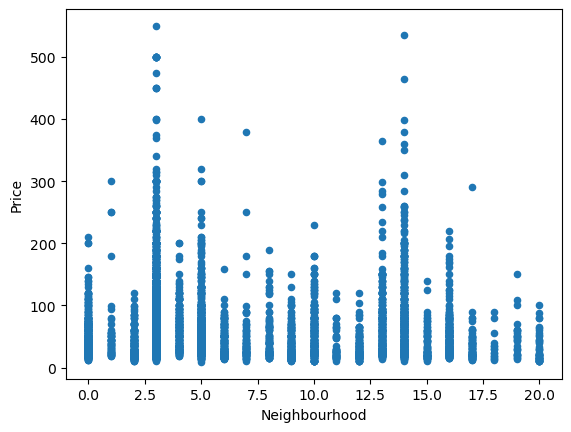

In [371]:
df_train.plot(kind = 'scatter',x='Neighbourhood',y = 'Price')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

In [372]:
df_train['Property Type'].value_counts()

0     6868
11     521
1      230
6      202
12     179
13     153
9       24
7       23
5       13
14       8
10       5
18       3
17       3
8        2
2        1
3        1
4        1
15       1
16       1
Name: Property Type, dtype: int64

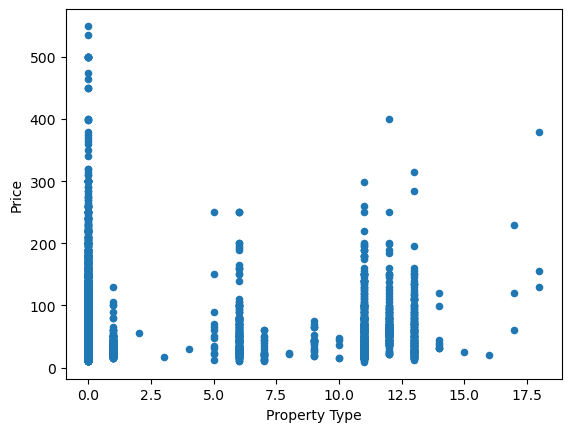

In [373]:
df_train.plot(kind = 'scatter',x='Property Type',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

In [374]:
df_train['Room Type'].value_counts()

0    5247
1    2896
2      96
Name: Room Type, dtype: int64

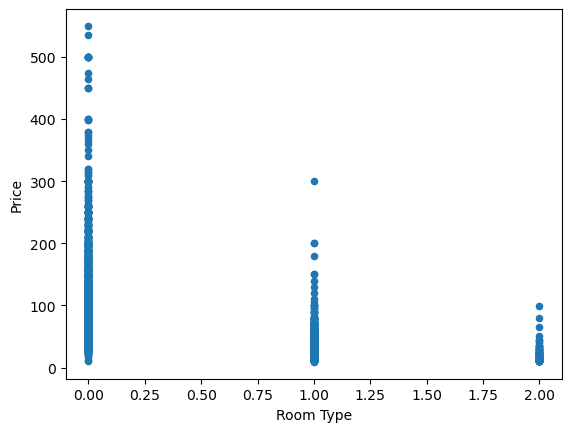

In [375]:
df_train.plot(kind = 'scatter',x='Room Type',y = 'Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [376]:
df_train['Accommodates'].value_counts()

2     2925
4     2005
1      931
3      841
6      682
5      425
8      165
7      105
10      60
9       37
16      20
12      19
11      12
14       9
13       3
Name: Accommodates, dtype: int64

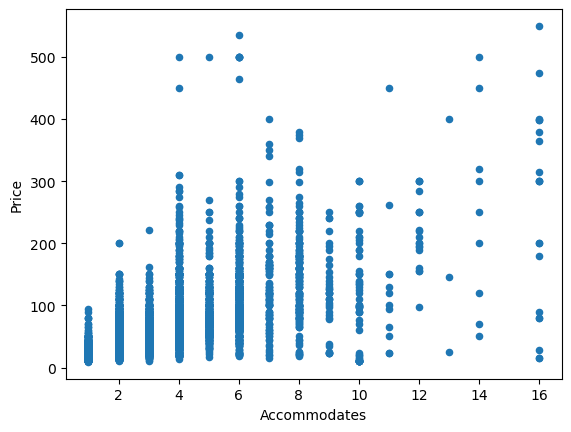

In [377]:
df_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

In [378]:
df_train['Bathrooms'].value_counts()

1     3885
2     2356
3      971
4      530
5      224
6      117
7       50
8       40
10      25
9       17
16       8
12       5
14       4
11       3
13       2
15       2
Name: Bathrooms, dtype: int64

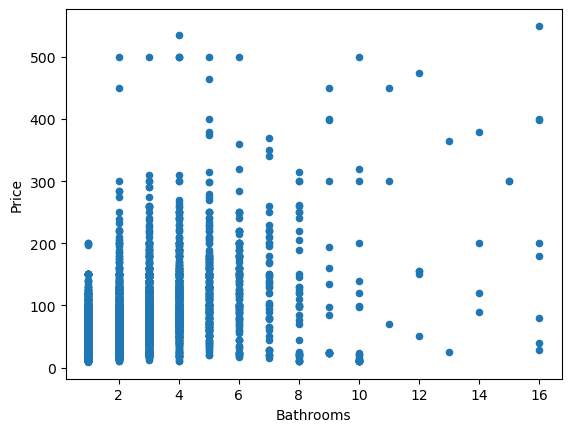

In [379]:
df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [380]:
df_train['Bedrooms'].value_counts()

1     3885
2     2356
3      971
4      530
5      224
6      117
7       50
8       40
10      25
9       17
16       8
12       5
14       4
11       3
13       2
15       2
Name: Bedrooms, dtype: int64

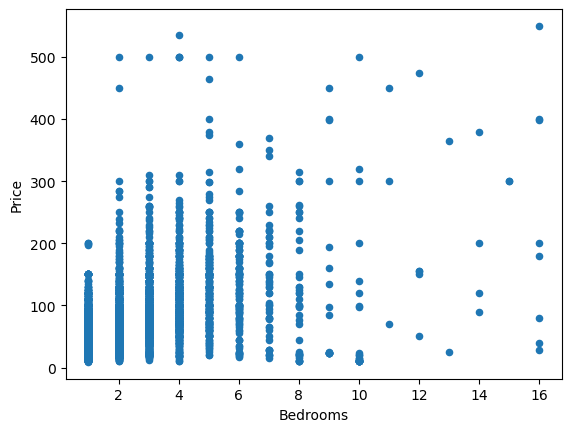

In [381]:
df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [382]:
df_train['Beds'].value_counts()

1     3885
2     2356
3      971
4      530
5      224
6      117
7       50
8       40
10      25
9       17
16       8
12       5
14       4
11       3
13       2
15       2
Name: Beds, dtype: int64

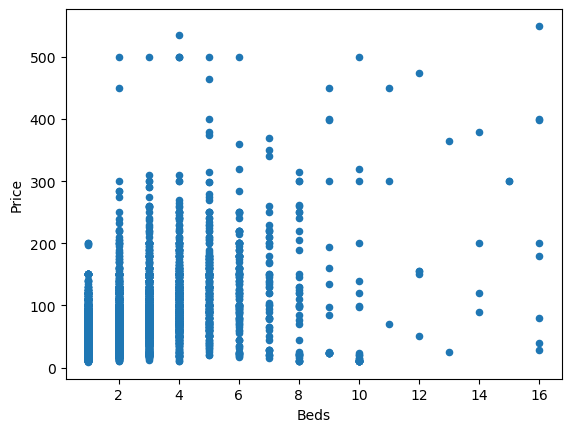

In [383]:
df_train.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

In [384]:
df_train['Cleaning Fee'].value_counts()

28     3090
30      828
20      788
10      538
25      492
       ... 
43        1
350       1
68        1
78        1
73        1
Name: Cleaning Fee, Length: 76, dtype: int64

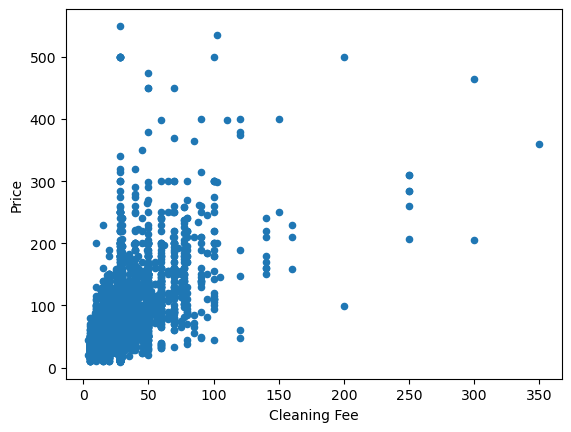

In [385]:
df_train.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Price')
plt.show()

In [386]:
df_train['Availability 90'].value_counts()

0     893
90    236
36    143
35    122
53    120
     ... 
87     47
81     44
85     41
86     40
83     37
Name: Availability 90, Length: 91, dtype: int64

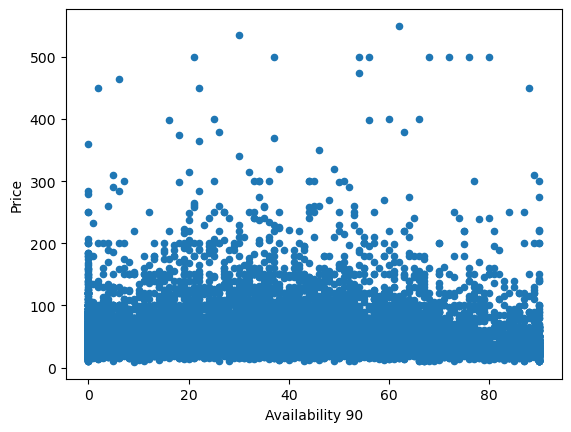

In [387]:
df_train.plot(kind = 'scatter',x='Availability 90',y = 'Price')
plt.xlabel('Availability 90')
plt.ylabel('Price')
plt.show()

In [388]:
df_train['Review Scores Rating'].value_counts()

100    1457
93      564
96      561
95      546
97      507
98      468
90      463
94      446
80      429
92      360
91      341
89      262
87      255
88      243
99      213
85      165
84      124
86      121
83      109
60       79
82       74
81       47
70       44
78       44
73       41
75       40
77       39
76       27
40       24
79       20
67       17
74       16
72       15
20       15
65       12
71        9
50        8
68        6
64        4
47        4
53        4
63        2
69        2
66        2
30        2
33        1
52        1
49        1
55        1
56        1
62        1
58        1
57        1
Name: Review Scores Rating, dtype: int64

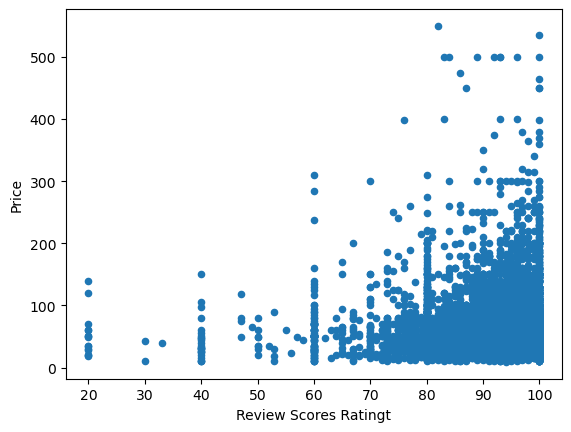

In [389]:
df_train.plot(kind = 'scatter',x='Review Scores Rating',y = 'Price')
plt.xlabel('Review Scores Ratingt')
plt.ylabel('Price')
plt.show()

In [390]:
df_train['Amenities_Count'].value_counts()

15    747
14    711
16    665
13    645
12    624
17    612
11    556
18    543
10    423
19    420
20    394
9     364
21    300
8     248
22    215
7     140
23    131
6     117
24     99
25     54
5      45
26     45
27     34
1      32
2      21
4      17
3      12
28     12
29      6
30      3
31      2
32      1
34      1
Name: Amenities_Count, dtype: int64

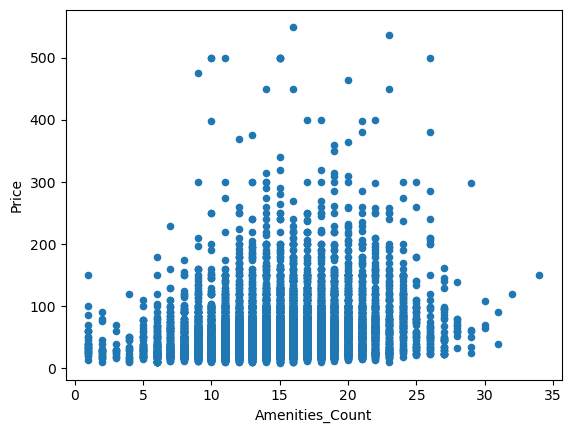

In [391]:
df_train.plot(kind = 'scatter',x='Amenities_Count',y = 'Price')
plt.xlabel('Amenities_Count')
plt.ylabel('Price')
plt.show()

## 6. Matriz de correlación

Después de limpiar y analizar las variables se calcula la matriz de correlación.

In [392]:
df_train.corr()

,Price,Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Availability 90,Review Scores Rating,Amenities_Count
Price,1.000000,-0.073938,-0.047763,-0.521987,0.645362,0.525308,0.525308,0.525308,0.542674,-0.070618,0.065350,0.226297
Neighbourhood,-0.073938,1.000000,0.059163,0.129661,-0.076141,-0.012084,-0.012084,-0.012084,0.036655,0.082373,-0.037190,0.021540
Property Type,-0.047763,0.059163,1.000000,0.105730,-0.039005,-0.001860,-0.001860,-0.001860,-0.039689,0.053335,0.013771,0.029120
Room Type,-0.521987,0.129661,0.105730,1.000000,-0.472146,-0.250569,-0.250569,-0.250569,-0.254548,0.246257,0.003220,-0.203164
Accommodates,0.645362,-0.076141,-0.039005,-0.472146,1.000000,0.836516,0.836516,0.836516,0.353786,-0.079300,-0.063623,0.192013
Bathrooms,0.525308,-0.012084,-0.001860,-0.250569,0.836516,1.000000,1.000000,1.000000,0.318028,-0.025861,-0.051109,0.143873
Bedrooms,0.525308,-0.012084,-0.001860,-0.250569,0.836516,1.000000,1.000000,1.000000,0.318028,-0.025861,-0.051109,0.143873
Beds,0.525308,-0.012084,-0.001860,-0.250569,0.836516,1.000000,1.000000,1.000000,0.318028,-0.025861,-0.051109,0.143873
Cleaning Fee,0.542674,0.036655,-0.039689,-0.254548,0.353786,0.318028,0.318028,0.318028,1.000000,-0.040150,0.010214,0.122865
Availability 90,-0.070618,0.082373,0.053335,0.246257,-0.079300,-0.025861,-0.025861,-0.025861,-0.040150,1.000000,-0.083931,-0.055717


- 'Neighbourhood', 'Property Type', 'Room Type' y 'Availability 90' tienen una correlación negativa y baja respecto al precio, por lo que la influencia parece mímima para determinar el precio de la propiedad con los datos que se tienen. 
- 'Accommodates' tiene una correlación positiva moderada con el precio, indicando que las propiedades con mayor capacidad tienden a tener precios mas altos. Lo que puede resultar es que a mayor capacidad de personas a alojar, mayor el precio.
- 'Bathrooms', 'Bedrooms', 'Beds' y 'Cleaning Fee' tienen una correlación positiva alta respecto al precio por lo que a mayor cantidad de estas variables el precio es mas caro. 
-  'Review Scores Rating' tiene una correlación positiva muy baja con el precio, indicando que no influye de manera significativa en el precio. 
- 'Amenities_Count' tiene una correlación positiva moderada con el precio. Aquellas propiedades con mas comodidades pueden hacer incrementar ligeramente el precio. 

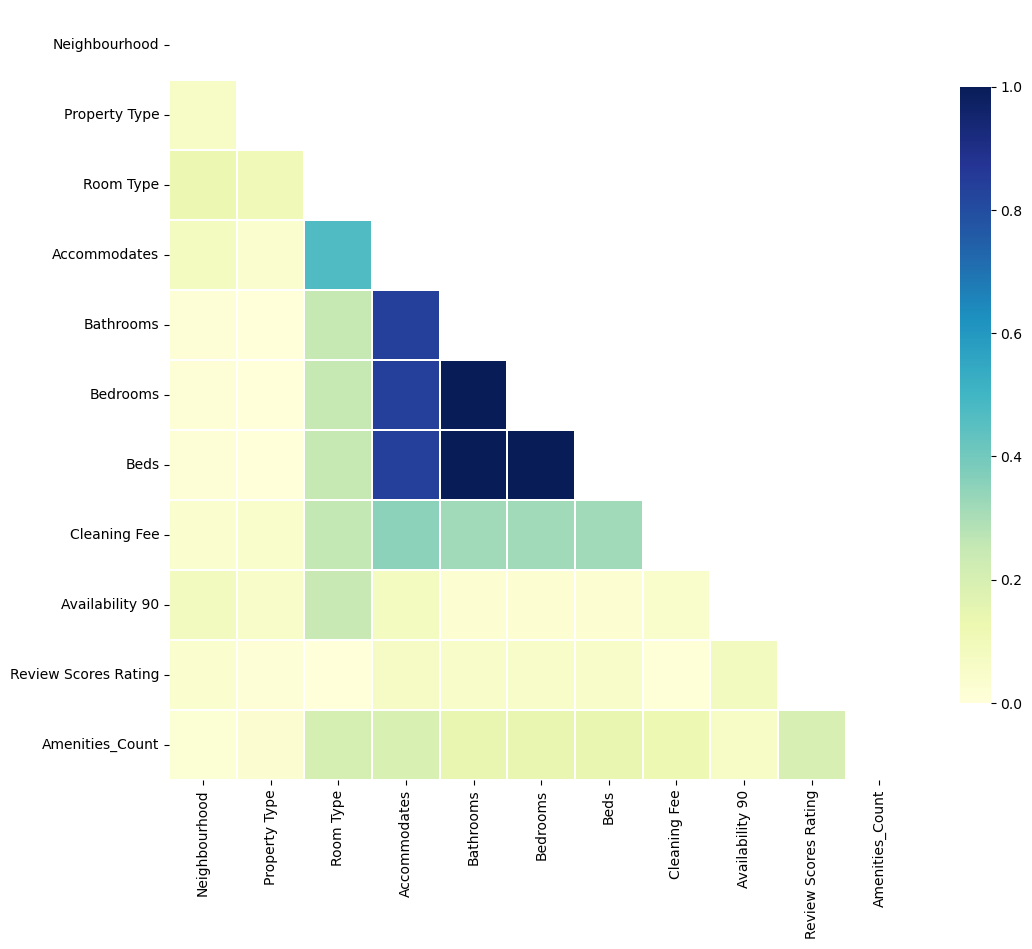

In [393]:
import seaborn as sns

corr = np.abs(df_train.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## 7. Pipeline

Se crea una función con los cambios realizados en train para poder aplicarlos directamente a test.

In [394]:
def pipeline(df):
    df = df.drop(columns=['Square Feet'])

    df = df.dropna(subset=['Neighbourhood Group Cleansed', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating'])
    df = df.rename(columns={'Neighbourhood Group Cleansed': 'Neighbourhood'})

    encoder = OrdinalEncoder()
    columns_to_encode = ['Neighbourhood', 'Property Type', 'Room Type']
    df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

    df['Amenities'] = df['Amenities'].fillna('')
    df['Amenities_Count'] = df['Amenities'].str.split(',').apply(len)
    df = df.drop(['Amenities'], axis=1)

    cleaning_fee_mean = df['Cleaning Fee'].mean()
    df['Cleaning Fee'].fillna(cleaning_fee_mean, inplace=True)

    columnas = df.columns.tolist()
    columnas.insert(0, columnas.pop(columnas.index('Price')))
    df = df[columnas]

    df['Neighbourhood'] = df['Neighbourhood'].round().astype(int)
    df['Property Type'] = df['Property Type'].round().astype(int)
    df['Room Type'] = df['Room Type'].round().astype(int)
    df['Bathrooms'] = df['Beds'].round().astype(int)
    df['Bedrooms'] = df['Beds'].round().astype(int)
    df['Beds'] = df['Beds'].round().astype(int)
    df['Cleaning Fee'] = df['Cleaning Fee'].round().astype(int)
    df['Availability 90'] = df['Availability 90'].round().astype(int)
    df['Review Scores Rating'] = df['Review Scores Rating'].round().astype(int)

    return df

Aplicamos la función a los datos de test.

In [395]:
df_test = pd.read_csv('test.csv', sep=';', decimal='.')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Group Cleansed  2655 non-null   object 
 1   Property Type                 2655 non-null   object 
 2   Room Type                     2655 non-null   object 
 3   Accommodates                  2655 non-null   int64  
 4   Bathrooms                     2649 non-null   float64
 5   Bedrooms                      2650 non-null   float64
 6   Beds                          2643 non-null   float64
 7   Amenities                     2618 non-null   object 
 8   Square Feet                   100 non-null    float64
 9   Price                         2653 non-null   float64
 10  Cleaning Fee                  1609 non-null   float64
 11  Availability 90               2655 non-null   int64  
 12  Review Scores Rating          2105 non-null   float64
dtypes: 

In [396]:
df_test = pipeline(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2654
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 2097 non-null   float64
 1   Neighbourhood         2097 non-null   int64  
 2   Property Type         2097 non-null   int64  
 3   Room Type             2097 non-null   int64  
 4   Accommodates          2097 non-null   int64  
 5   Bathrooms             2097 non-null   int64  
 6   Bedrooms              2097 non-null   int64  
 7   Beds                  2097 non-null   int64  
 8   Cleaning Fee          2097 non-null   int64  
 9   Availability 90       2097 non-null   int64  
 10  Review Scores Rating  2097 non-null   int64  
 11  Amenities_Count       2097 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 213.0 KB


In [397]:
y_train = df_train['Price'].values
X_train = df_train.drop(['Price'], axis=1).values
feature_names = df_train.drop(['Price'], axis=1).columns

y_test = df_test['Price'].values
X_test = df_test.drop(['Price'], axis=1).values

Escalamos con los datos.

In [398]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Modelos

Regresión

In [399]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


poly_reg = make_pipeline(PolynomialFeatures(), LinearRegression())

degrees = [1, 2, 3]

param_grid = {'polynomialfeatures__degree': degrees}

grid_search = GridSearchCV(poly_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train_scaled, y_train)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f'Mejor grado: {best_degree}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.1s
[CV] END .......................polynomialfeatures__degree=3; total time=   0.5s
[CV] END .......................polynomialfeature

Nos da un resultado de mejor grado 2, aplicamos este dato a la Regresión. 

MSE train (grado 2): 842.1464106548921
MSE test (grado 2): 1229.2923741038906
RMSE train(grado 2): 29.019758969620888
RMSE test (grado 2): 35.06126600828742


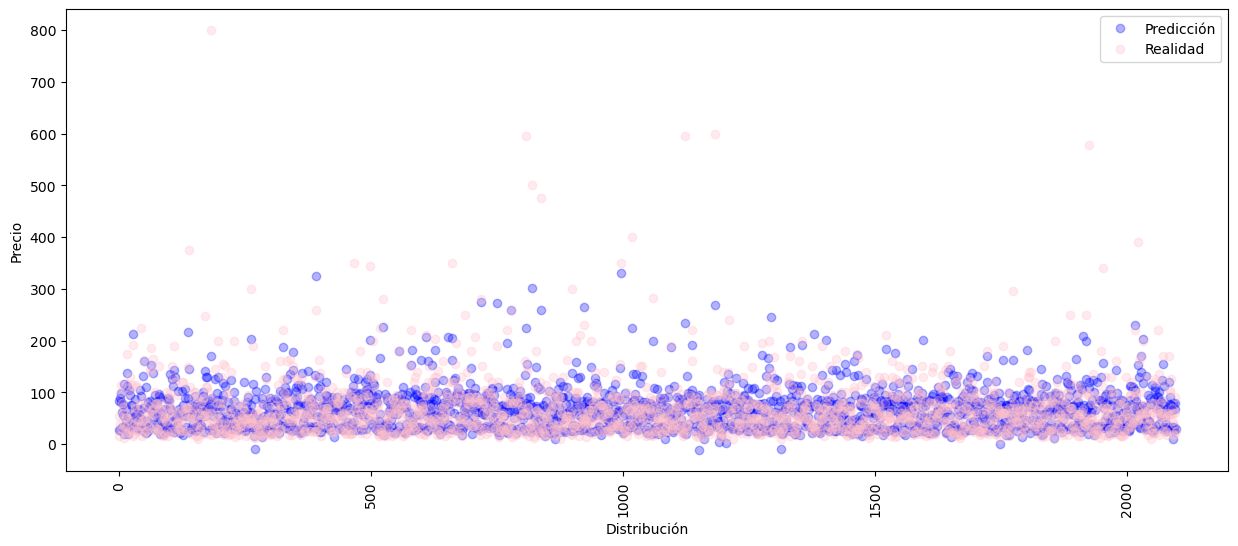

In [400]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialFeatures(degree=best_degree)

X_train_pr = poly_reg.fit_transform(X_train_scaled)
X_test_pr =poly_reg.fit_transform(X_test_scaled)
model = LinearRegression()

model.fit(X_train_pr, y_train)

y_pred_train = model.predict(X_train_pr)
y_pred_test = model.predict(X_test_pr)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f'MSE train (grado {best_degree}): {mse_train}')
print(f'MSE test (grado {best_degree}): {mse_test}')
print(f'RMSE train(grado {best_degree}): {rmse_train}')
print(f'RMSE test (grado {best_degree}): {rmse_test}')

plt.figure(figsize = (15, 6))
plt.plot(y_pred_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='blue',label='Predicción')
plt.plot(y_test, alpha=0.3,marker='o',linestyle="none", markersize=6,color='pink',label='Realidad')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución")
plt.legend()
plt.show()

Se calculan los residuos. 

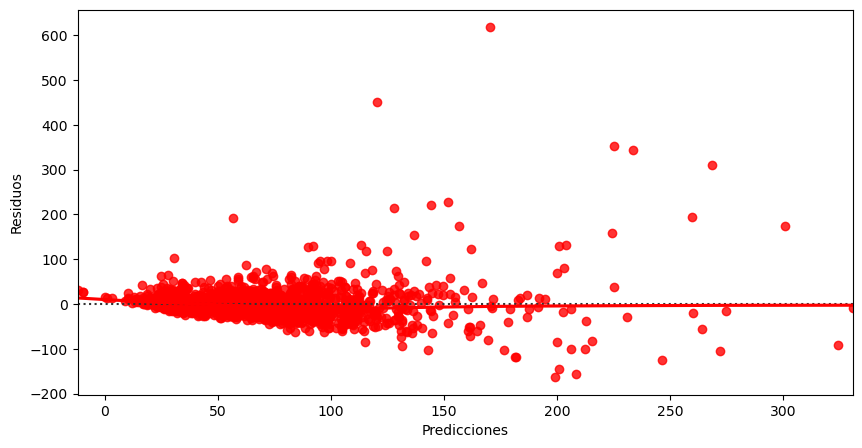

In [401]:
import seaborn as sns

residuals = y_test - y_pred_test

plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred_test, y=residuals, lowess=True, color="red")
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

Random Forest

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s


[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.3s
[CV] END ........................................max_depth=5; total time=   0.3s
[CV] END ........................................max_depth=5; total time=   0.3s
[CV] END ........................................max_depth=6; total time=   0.3s
[CV] END ........................................max_depth=6; total time=   0.3s
[CV] END ........................................max_depth=6; total time=   0.3s
[CV] END ........................................max_depth=7; total time=   0.3s
[CV] END ...................

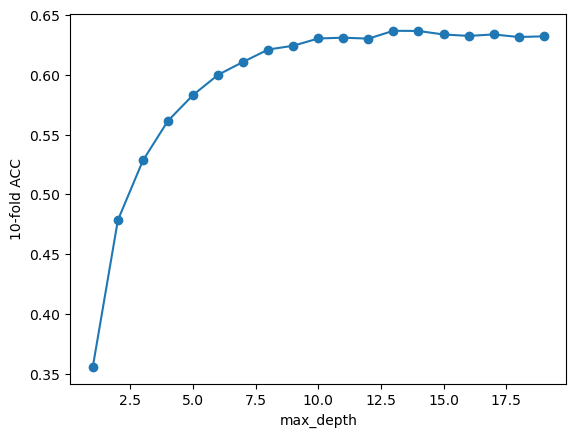

In [402]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [403]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train_scaled,y_train)

print("Train: ",randomForest.score(X_train_scaled,y_train))
print("Test: ",randomForest.score(X_test_scaled,y_test))

y_train_RF = randomForest.predict(X_train_scaled)
y_test_RF  = randomForest.predict(X_test_scaled)

mseTrainModelRF = mean_squared_error(y_train,y_train_RF)
mseTestModelRF = mean_squared_error(y_test,y_test_RF)

print('MSE Modelo train Random Forest: %0.3g' % mseTrainModelRF)
print('MSE Modelo test Random Forest: %0.3g' % mseTestModelRF)

print('RMSE Modelo train Random Forest: %0.3g' % np.sqrt(mseTrainModelRF))
print('RMSE Modelo test Random Forest: %0.3g' % np.sqrt(mseTestModelRF))

Train:  0.8591745196730403
Test:  0.6105983767490932
MSE Modelo train Random Forest: 323
MSE Modelo test Random Forest: 1.18e+03
RMSE Modelo train Random Forest: 18
RMSE Modelo test Random Forest: 34.4


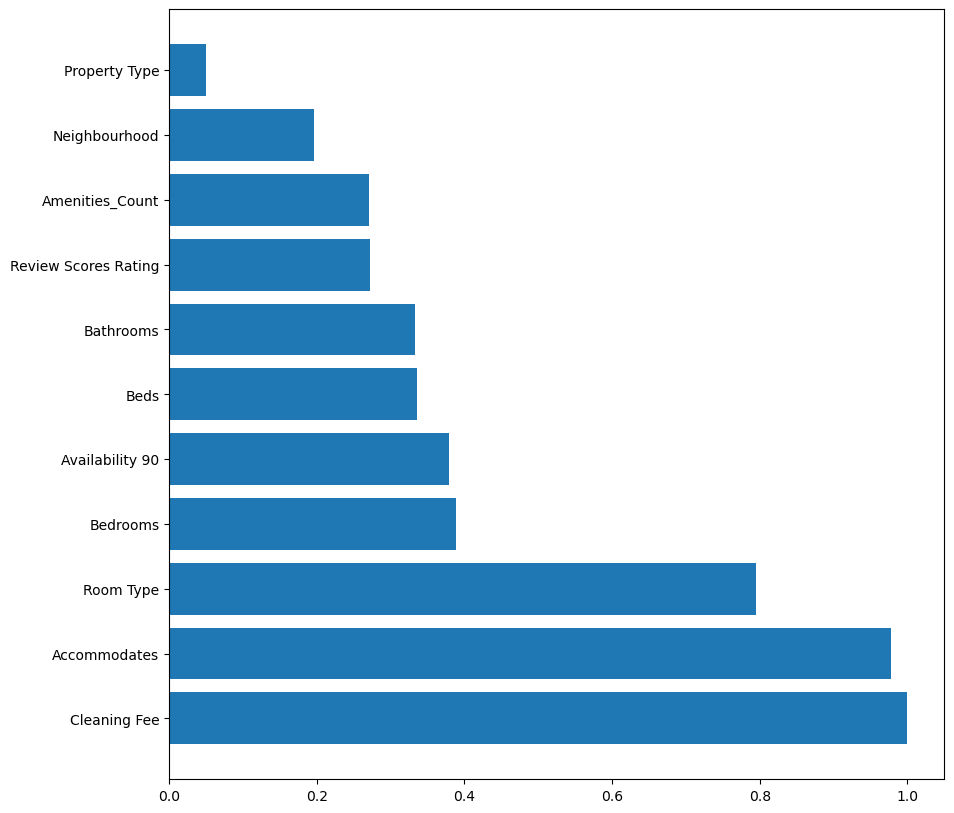

In [404]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train_scaled.shape[1]),importances[indices])
plt.yticks(range(X_train_scaled.shape[1]),feature_names[indices])
plt.show()

Bagging Regressor

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.2s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=1; total time=   0.3s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=2; total time=   0.4s
[CV] END ........................base_estimator__max_depth=3; total time=   0.5s
[CV] END ........................base_estimator_

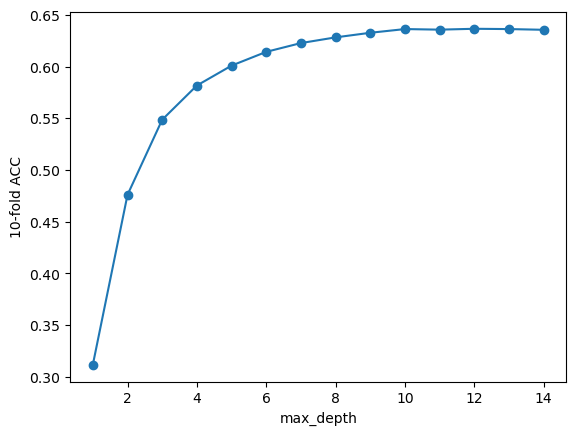

In [405]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [406]:
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),n_estimators=200).fit(X_train_scaled,y_train)

print("Train: ",baggingModel.score(X_train_scaled,y_train))
print("Test: ",baggingModel.score(X_test_scaled,y_test))

y_train_BG = randomForest.predict(X_train_scaled)
y_test_BG  = randomForest.predict(X_test_scaled)

mseTrainModelBG = mean_squared_error(y_train,y_train_BG)
mseTestModelBG = mean_squared_error(y_test,y_test_BG)

print('MSE Modelo train Bagging: %0.3g' % mseTrainModelBG)
print('MSE Modelo test Bagging: %0.3g' % mseTestModelBG)

print('RMSE Modelo train Bagging: %0.3g' % np.sqrt(mseTrainModelBG))
print('RMSE Modelo test Bagging: %0.3g' % np.sqrt(mseTestModelBG))

Train:  0.8556763998835208
Test:  0.6349565024197441
MSE Modelo train Bagging: 323
MSE Modelo test Bagging: 1.18e+03
RMSE Modelo train Bagging: 18
RMSE Modelo test Bagging: 34.4


Comparando los resultados de Random Forest y Bagging la diferencia no es significativa. No parece que haya signos evidentes de sobreajuste (overfitting) ni de subajuste (underfitting) ya que ambos están generalizando bien.